# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
## 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
## 2. Now Find the number of posts these handles have done in the previous 3 days.
## 3. Depict this information using a suitable graph.



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [C:\Users\moitr\.wdm\drivers\chromedriver\win32\97.0.4692.71\chromedriver.exe] found in cache
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/230343412.py:19: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/230343412.py:51: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  sb = driver.find_element_by_xpath("//input[@placeholder = 'Search']")
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/230343412.py:55: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  arr = driver.find_elements_by_class_name("-qQT3")
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/230343412.py:68: DeprecationWarning: find_ele

Top 5 pages having the highest number of followers: 
foodys : 8464297
dilsefoodie : 965521
delhifoodwalks : 159286
food : 159183
foodtechsociety : 28480


C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/230343412.py:105: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  td = np.array(td)


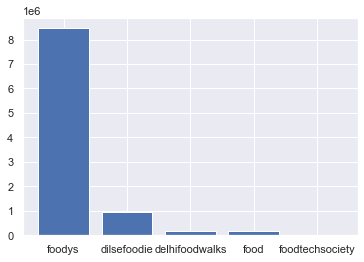

Number of posts uploaded by the same Top 5 pages: 
foodys : 4
dilsefoodie : 4
delhifoodwalks : 6
food : 2
foodtechsociety : 3


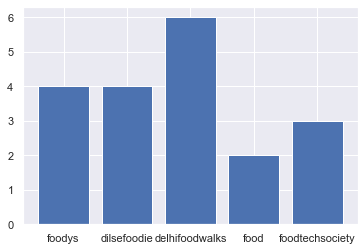

In [66]:
# importing all the necessary libraries
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import numpy as np
from bs4 import BeautifulSoup
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns


# initiating a webdriver session
driver = webdriver.Chrome(ChromeDriverManager().install())
sns.set()
    
def login():

    # sending a get request to instagrams landing page 
    driver.get("https://www.instagram.com/")

    # using explicit wait till the home page loads and username and password textboxes can be located
    un = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME, 'username')))
    ps = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME, 'password')))

    # passing username and password and pressing enter after passing the password
    un.send_keys(username)
    ps.send_keys(password)
    ps.send_keys(Keys.ENTER)

    # using explicit wait till the next page loads and selecting not to save password after the page has loaded
    bt1  = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME, 'cmbtv')))
    bt1.click()

    # using explicit wait till the next page loads and selecting no notifications after the page has loaded
    bt2 = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//*[contains(@class, "HoLwm")]')))
    bt2.click()

login()

def top10searchanalysis(s):
    dict ={}

    for i in range(10):
        # Searching for sting provided
        sb = driver.find_element_by_xpath("//input[@placeholder = 'Search']")
        sb.send_keys(s)
        
        WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//*[contains(@class, "-qQT3")]')))
        arr = driver.find_elements_by_class_name("-qQT3")
        
        # clicking i-th search result 
        arr[i].click()

        time.sleep(3)
        
        # Finding the follower count
        followers = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//a[@class = "-nal3 "]/span')))
        num_followers = followers.get_attribute("title").split(",")
        
        nf = ""
        for i in num_followers:
            nf = nf + i
        num_followers = int(nf)
        
        # Finding Username
        username = driver.find_element_by_tag_name("h2")
        username = username.get_attribute("innerHTML")

        ## Counting the number of posts that have been posted within 3 days
        postcount = 0
        driver.find_element_by_class_name("eLAPa").click()
        
        # Finding and processing the date post was made
        postdate = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//a[@class = "c-Yi7"]/time')))
        postdate = postdate.get_attribute("datetime").split('T')[0]
        postdate = postdate.split('-')
        postdate = date(int(postdate[0]), int(postdate[1]), int(postdate[2]))
        
        # Finding todays date and calculating the duration
        today = date.today()
        duration = today - postdate

        try:
            while int(duration.days) <=3:
                postcount += 1
            
                # Clicking on the next button 
                driver.find_element_by_class_name("l8mY4").click()
                time.sleep(3)
                
                # Finding and processing the date post was made
                postdate = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//a[@class = "c-Yi7"]/time')))
                postdate = postdate.get_attribute("datetime").split('T')[0]
                postdate = postdate.split('-')
                postdate = date(int(postdate[0]), int(postdate[1]), int(postdate[2]))
                
                # Finding how long it has been from today
                duration = today - postdate

            # Clicking on close to close the opened post and make searchbar accessible
            driver.find_element_by_class_name("NOTWr").click()
        except:
            # Clicking close on opened post in case of exception like no next post available
             driver.find_element_by_class_name("NOTWr").click()
        
        # Storing the data in a dictionary
        dict[username] = [num_followers, postcount]

    # Sorting the dictionary
    td = sorted(dict.items(), key = lambda item:item[1], reverse = True)
    td = np.array(td)
    
    # Arranging data properly so that graphs can be plotted
    names = np.array(td[0:5,0])
    temp = np.array(td[0:5,1])
    follower_count = []
    post_count = []
    
    for i in temp:
        follower_count.append(i[0])
        post_count.append(i[1])
    
    # Plotting the bargraph for top 5 pages having the highest number of followers
    print("Top 5 pages having the highest number of followers: ")
    for i,j in zip(names,follower_count):
        print(i,":",j)
        
    plt.bar(names, follower_count)
    plt.show()
    
    # Plotting the bargraph for top 5 pages with their upload count
    print("Number of posts uploaded by the same Top 5 pages: ")
    for i,j in zip(names,post_count):
        print(i,":",j)
        
    plt.bar(names, post_count)
    plt.show()
    
        
time.sleep(3)
top10searchanalysis("food")

time.sleep(10)
driver.close()

# 2. Your friend also needs a list of hashtags that he should use in his posts.
## 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
## 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
## 3. Create a csv file with two columns : the word and its frequency
## 4. Now, find the hashtags that were most popular among these bloggers
## 5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [C:\Users\moitr\.wdm\drivers\chromedriver\win32\97.0.4692.71\chromedriver.exe] found in cache
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/1881722013.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/1881722013.py:57: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_class_name("eLAPa").click()
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/1881722013.py:80: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_class_name("l8mY4").click()
C:\Users\moitr\AppData\Local\Temp/ipykernel_6412/1881722013.py:82: DeprecationWarning: find_element_by_* comman

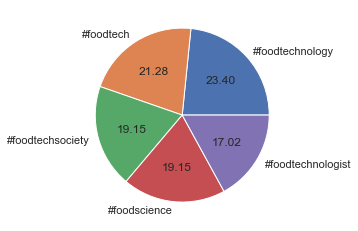

In [113]:
# importing all the necessary libraries
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import re

# initiating a webdriver session
driver = webdriver.Chrome(ChromeDriverManager().install())
sns.set()
    
def login():

    # sending a get request to instagrams landing page 
    driver.get("https://www.instagram.com/")

    # using explicit wait till the home page loads and username and password textboxes can be located
    un = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME, 'username')))
    ps = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME, 'password')))

    # passing username and password and pressing enter after passing the password
    un.send_keys(username)
    ps.send_keys(password)
    ps.send_keys(Keys.ENTER)

    # using explicit wait till the next page loads and selecting not to save password after the page has loaded
    bt1  = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME, 'cmbtv')))
    bt1.click()

    # using explicit wait till the next page loads and selecting no notifications after the page has loaded
    bt2 = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//*[contains(@class, "HoLwm")]')))
    bt2.click()

login()

page_names = names

def openAccount(account_name):
    # Searching for food in the search bar. Not using explicit wait because the page is already loaded
    driver.get("https://www.instagram.com/" +str(account_name) + "/")
    
def extractdata():
    
    # Initiating text to store all the content of top 10 posts of a profile 
    text = ""
    # Initiating like counter to store total number of likes the top 10 posts have recieved
    like_count = 0
    
    # Clicking on the firstpost of the page
    driver.find_element_by_class_name("eLAPa").click()
    postct = 10
    i = 0

    # Using try expect case to tackle situation where number of post < 10
    try:
        for i in range(10):
            
            # Scrapping the content of the post
            content = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//div[@class = "C4VMK"]/span')))
            content = BeautifulSoup(content.get_attribute('innerHTML'), 'html.parser')
            text = text + " " + str(content.text)
            
            # Using Try else box to find likes of both video and post type of objects
            # In videos like isnt visible but is visible once we click on the number of views which is visible
            try: 
                # If likecount is visible add to total like count else go to exception block
                like = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//a[@class = "zV_Nj"]/span')))
                like = int(like.get_attribute('innerHTML').replace(',',''))
                like_count += like

            except:
                
                # If like count is not visible clicking on views and then clicking on like and hence increasing the like count
                view = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//span[@class = "vcOH2"]')))
                view.click()
                time.sleep(2)
                like = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, '//div[@class = "vJRqr"]/span')))
                like = int(like.get_attribute('innerHTML').replace(',',''))
                like_count += like
            
            # Pressing next to go to the next post
            driver.find_element_by_class_name("l8mY4").click()

        # Closing the open Post
        driver.find_element_by_class_name("NOTWr").click()

    except:
        
        # Incase total number of posts <10 and hence no next option is available flow goes into this block
        # Closing the opened post as no more posts are present, updating total post count
        postct = i+1
        driver.find_element_by_class_name("NOTWr").click()

    # Returning the contents, like count and number of posts for respective username passed
    return [text, like_count, postct]
    

# Storing the data obtained from each page in an array 
arr = []
for i in page_names:
    time.sleep(3)
    openAccount(i)
    a = extractdata()
    arr.append(a)
    
characters_not_required = "[-/\"/=/●/⬇/+/“/”/&/*/%/-/📌/☀/😆/🎥/✅/⏩/🙏/🔴/👆/🎬/🥶/📍/👋/🌯/👀/📸/🥯/🥬/😁/😀/😄/💣/🍟/🎶/🤔/📷/👌/🥰/🥒/🔪/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/0-9/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"

# Using RE to remove unnecessary characters and further splitting by space and adding to word dictionary and hashtag dict
def get_word_frequency(content,words_dictionary,hastag_dictionary):
    words = content.split(" ")
    for word in words:
        
        # Removing unnecessary characters
        word = re.sub(characters_not_required, "", word)
        if word!="":
            
            # Adding to hashtag dict is 0th element of string is #
            if word[0]=="#":
                hastag_dictionary[word] = hastag_dictionary.get(word,0)+1
                continue
            words_dictionary[word] = words_dictionary.get(word,0)+1

text = []

for i in arr:
    text.append(i[0])

# Initiating dictionaries to store frequencies
words_dictionary = {}
hastag_dictionary = {}

# Iterating over all the text obtained and updating the dictionaries 
for content in text:
    get_word_frequency(content,words_dictionary,hastag_dictionary)
    
words = [ key for key,value in words_dictionary.items()]
word_frequency = [ value for key,value in words_dictionary.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

# Dataframe created using Pandas which will help us to create the CSV file
words_df = pd.DataFrame(columns)

# Create the CSV file without Index values
words_df.to_csv(r'WordFrequency.csv', index=False)

# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = [[value,key] for key,value in hastag_dictionary.items()]
hastag_with_frequency.sort(reverse=True)

# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()



# 3. You need to also calculate average followers : likes ratio for the obtained handles.
## 1. Followers : Likes ratio is calculated as follows:
## 2. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
## 3. Calculate the average likes for a handle.
## 4. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
## 5. Create a bar graph to depict the above obtained information.

---------------------------------
Total Likes for 10 Posts
---------------------------------
foodys 566787
dilsefoodie 165233
delhifoodwalks 3993
food 6227
foodtechsociety 7224
---------------------------------
Average Likes
---------------------------------
foodys 56679
dilsefoodie 16523
delhifoodwalks 399
food 623
foodtechsociety 722
---------------------------------
Ratio Followers : Avg Likes
---------------------------------
foodys 149
dilsefoodie 58
delhifoodwalks 398
food 255
foodtechsociety 39


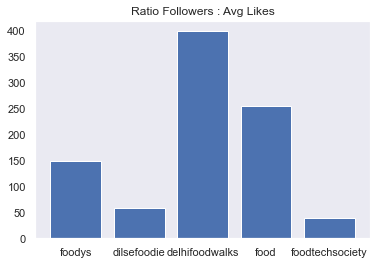

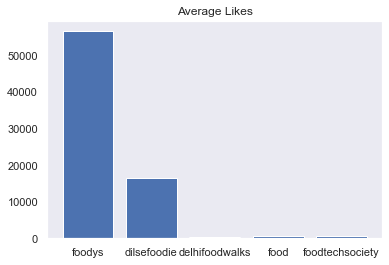

In [115]:
#NOTE: All the necessary data about like count, page name, follower count has been obtained from the above codes.

print("Total Likes for 10 Posts")
for i in range(5):
    print(page_names[i],arr[i][1])
    
# Calculate the average likes for a handle.
print("Average Likes")

# To store the average_likes for each handle
average_likes_list = []
for i in range(5):
    average_likes = arr[i][1]/arr[i][2]
    average_likes_list.append(average_likes)
    print(page_names[i],format(average_likes,".0f"))

# To store the follower:avg likes ratio  
print("Ratio Followers : Avg Likes")
avg_followers = []
for i in range(5):
    avg_followers_count = int(follower_count[i]/average_likes_list[i])
    avg_followers.append(avg_followers_count)
    print(page_names[i], avg_followers_count)


    
# Create a bar graph to depict the ratio
plt.bar(page_names,avg_followers)
plt.title('Ratio Followers : Avg Likes')
plt.grid()
plt.show()

# Create a bar graph to depict the average likes
plt.bar(page_names,average_likes_list)
plt.title('Average Likes')
plt.grid()
plt.show()